# BayWheels Station Dataset Exploration


## Prepared By: Victoria Asefon

This document explores the bike sharing dataset for BayWheels Station. The dataset contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


### Table of Content

- <a href="#wrangle">Preliminary Wrangling</a>
- <a href="#analyze">Exploratory Data Analysis</a>
- <a href="#univariate">Univariate Exploration</a>
- <a href="#bivariate">Bivariate Exploration</a>
- <a href="#multivariate">Multivariate Exploration</a>
- <a href="#conclude">Conclusion</a>

<a id='wrangle'></a>
### Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
import seaborn as sns
import datetime
import glob

%matplotlib inline

In [2]:
# Load all data in a dataframe
all_df = []
csv_files = glob.glob('Bikeshare_data/*-fordgobike-tripdata.csv')

for files in csv_files:
    print(f'Loading {files}')
    new_df = pd.read_csv(files, parse_dates=True)
    all_df.append(new_df)

Loading Bikeshare_data\201804-fordgobike-tripdata.csv
Loading Bikeshare_data\201805-fordgobike-tripdata.csv
Loading Bikeshare_data\201806-fordgobike-tripdata.csv
Loading Bikeshare_data\201807-fordgobike-tripdata.csv
Loading Bikeshare_data\201808-fordgobike-tripdata.csv
Loading Bikeshare_data\201809-fordgobike-tripdata.csv
Loading Bikeshare_data\201810-fordgobike-tripdata.csv
Loading Bikeshare_data\201811-fordgobike-tripdata.csv
Loading Bikeshare_data\201812-fordgobike-tripdata.csv
Loading Bikeshare_data\201901-fordgobike-tripdata.csv
Loading Bikeshare_data\201902-fordgobike-tripdata.csv
Loading Bikeshare_data\201903-fordgobike-tripdata.csv
Loading Bikeshare_data\201904-fordgobike-tripdata.csv


In [3]:
len(all_df)

13

In [4]:
# concatenate dataframe
bike_df = pd.concat(all_df)

In [5]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,72393,4/30/18 22:49,5/1/18 18:56,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3940,Customer,NaN,NaN,No
1,81034,4/30/18 17:46,5/1/18 16:16,122.0,19th St at Mission St,37.760299,-122.418892,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,3374,Customer,NaN,NaN,No
2,86142,4/30/18 16:07,5/1/18 16:02,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3191,Subscriber,1974.0,Male,Yes
3,68839,4/30/18 17:11,5/1/18 12:19,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,115.0,Jackson Playground,37.765026,-122.398773,2970,Customer,1974.0,Female,No
4,59091,4/30/18 18:45,5/1/18 11:10,196.0,Grand Ave at Perkins St,37.808894,-122.256460,233.0,12th St at 4th Ave,37.795812,-122.255555,522,Customer,1965.0,Male,No


In [6]:
print(bike_df.shape, "\n\n")
print(bike_df.info())

(2421723, 16) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421723 entries, 0 to 239110
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 314.1+ MB
None


> The initial dataset contains 2,421,723 rows and 16 columns.

In [7]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2.421723e+06,2.409222e+06,2.421723e+06,2.421723e+06,2.409222e+06,2.421723e+06,2.421723e+06,2.421723e+06,2.295064e+06
mean,8.262148e+02,1.278530e+02,3.776836e+01,-1.223507e+02,1.264585e+02,3.776823e+01,-1.223494e+02,3.047044e+03,1.983882e+03
std,2.183808e+03,1.065236e+02,1.063724e-01,1.737693e-01,1.065730e+02,1.459713e-01,3.676490e-01,1.798512e+03,1.026657e+01
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.100000e+01,1.878000e+03
25%,3.450000e+02,3.700000e+01,3.777041e+01,-1.224117e+02,3.600000e+01,3.777106e+01,-1.224113e+02,1.564000e+03,1.979000e+03
50%,5.490000e+02,9.300000e+01,3.778101e+01,-1.223974e+02,9.200000e+01,3.778107e+01,-1.223971e+02,2.978000e+03,1.986000e+03
75%,8.620000e+02,2.000000e+02,3.779728e+01,-1.222880e+02,1.970000e+02,3.779728e+01,-1.222894e+02,4.427000e+03,1.991000e+03
max,8.628100e+04,4.200000e+02,4.551000e+01,0.000000e+00,4.200000e+02,4.551000e+01,0.000000e+00,7.108000e+03,2.001000e+03


In [8]:
bike_df[bike_df.member_birth_year == bike_df.member_birth_year.min()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2/25/19 9:28,2/25/19 9:53,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No
195932,425,3/9/19 14:15,3/9/19 14:22,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,127.0,Valencia St at 21st St,37.756708,-122.421025,6168,Customer,1878.0,Female,No
197150,328,3/9/19 10:19,3/9/19 10:25,127.0,Valencia St at 21st St,37.756708,-122.421025,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,5907,Customer,1878.0,Female,No
113766,655,4/13/19 10:12,4/13/19 10:23,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,386.0,24th St at Bartlett St,37.752105,-122.419724,7048,Customer,1878.0,Female,No
116113,371,4/12/19 20:07,4/12/19 20:13,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,386.0,24th St at Bartlett St,37.752105,-122.419724,6858,Customer,1878.0,Female,No
133358,246,4/11/19 15:26,4/11/19 15:30,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,6803,Customer,1878.0,Female,No
133646,334,4/11/19 14:46,4/11/19 14:51,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,6803,Customer,1878.0,Female,No


There's an outlier in the birth year column. Minimum year is 1878.

In [9]:
bike_df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12501
start_station_name          12501
start_station_latitude          0
start_station_longitude         0
end_station_id              12501
end_station_name            12501
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          126659
member_gender              126417
bike_share_for_all_trip         0
dtype: int64

In [10]:
bike_df.duplicated().sum()

0

In [11]:
bike_df.nunique()

duration_sec                17355
start_time                 420224
end_time                   419714
start_station_id              366
start_station_name            385
start_station_latitude        412
start_station_longitude       411
end_station_id                366
end_station_name              385
end_station_latitude          413
end_station_longitude         413
bike_id                      6513
user_type                       2
member_birth_year              92
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [12]:
bike_df.member_gender.value_counts()

Male      1688932
Female     566970
Other       39404
Name: member_gender, dtype: int64

In [13]:
bike_df.user_type.value_counts()

Subscriber    2068960
Customer       352763
Name: user_type, dtype: int64

In [14]:
bike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### Observations

1. Data contains 2,421,723 rows and 16 columns.
2. There are no duplicates.
2. Trip duration is in seconds. It should be converted to minutes for easier understnding.
3. `member_birth_year` is a float. `member_gender` is an object, should be a category. 
4. `start_time` and `end_time` are not in datetime format.
5. `start_station_name` and `end_station_name` contains 12,501 missing values. 
6. `member_birth_year` and `member_gender` contains 126,659 and 126,417 mising values respectively.
7. There's an outlier in the birth year column. Minimum year is 1878.
8. Some missing data are represented as NULL

### Data Cleaning

1. Drop unneeded columns ['start_station_latitude','start_station_longitude', 'end_station_latitude','bike_id' end_station_longitude'].
2. Convert trip duration to minutes.
3. Change data types for `member_birth_year`, `member_gender`, `bike_id`. `start_time` and `end_time`.
4. Fill or drop missing values.
5. Change `member_birth_year` to age.
6. Replace member birth year 1878 to 1978.
7. Replace NULL with NaN.
8. Fill missing values in `members_birth_year` column with the mean.
9. Fill missing values in `members_gender` with 'Others'.

### Data Cleaning

In [15]:
df = bike_df.copy()

In [16]:
# Drop unneeded columns and missing values
df.drop(columns=['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude', 
                 'start_station_id','end_station_id', 'bike_id', 'bike_share_for_all_trip'], inplace=True)

In [17]:
# replace NULL with nan
df.replace('NULL', np.nan, inplace=True)

#### Fill or drop missing Values

In [18]:
df.member_gender.unique()

array([nan, 'Male', 'Female', 'Other'], dtype=object)

In [19]:
# fill nan in members_birth_year with the mean
df.member_birth_year.fillna(int(df.member_birth_year.mean()), inplace=True)

# fill nan in gender with "Others"
df.member_gender.fillna('Other', inplace=True)

# drop every other NaN value
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

duration_sec          0
start_time            0
end_time              0
start_station_name    0
end_station_name      0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

In [21]:
# Change wrong data types
df.start_time = pd.to_datetime(df['start_time'])
df.end_time = pd.to_datetime(df['end_time'])
df = df.astype({'user_type':'category',
                'member_birth_year':'int64',
               'member_gender':'category'})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409222 entries, 0 to 239110
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   duration_sec        int64         
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   user_type           category      
 6   member_birth_year   int64         
 7   member_gender       category      
dtypes: category(2), datetime64[ns](2), int64(2), object(2)
memory usage: 133.3+ MB


#### Feature Engineering

In [23]:
# Convert trip duration to minutes¶
df['duration_min'] = (df['duration_sec']/60).round(2)
df.drop(columns='duration_sec',  inplace=True)

In [24]:
# Calculate members age from birth year as at 2019
df['age'] = df.start_time.dt.year - df['member_birth_year']

In [25]:
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,duration_min,age
0,2018-04-30 22:49:00,2018-05-01 18:56:00,Cyril Magnin St at Ellis St,Cyril Magnin St at Ellis St,Customer,1983,Other,1206.55,35
1,2018-04-30 17:46:00,2018-05-01 16:16:00,19th St at Mission St,San Francisco City Hall (Polk St at Grove St),Customer,1983,Other,1350.57,35
2,2018-04-30 16:07:00,2018-05-01 16:02:00,Golden Gate Ave at Polk St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,1974,Male,1435.70,44
3,2018-04-30 17:11:00,2018-05-01 12:19:00,Yerba Buena Center for the Arts (Howard St at ...,Jackson Playground,Customer,1974,Female,1147.32,44
4,2018-04-30 18:45:00,2018-05-01 11:10:00,Grand Ave at Perkins St,12th St at 4th Ave,Customer,1965,Male,984.85,53


In [26]:
# Investigate member with birth year 1878
df[df.member_birth_year == 1878]

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,duration_min,age
27370,2019-02-25 09:28:00,2019-02-25 09:53:00,San Francisco Ferry Building (Harry Bridges Pl...,24th St at Bartlett St,Customer,1878,Female,24.57,141
195932,2019-03-09 14:15:00,2019-03-09 14:22:00,23rd St at San Bruno Ave,Valencia St at 21st St,Customer,1878,Female,7.08,141
197150,2019-03-09 10:19:00,2019-03-09 10:25:00,Valencia St at 21st St,23rd St at San Bruno Ave,Customer,1878,Female,5.47,141
113766,2019-04-13 10:12:00,2019-04-13 10:23:00,23rd St at San Bruno Ave,24th St at Bartlett St,Customer,1878,Female,10.92,141
116113,2019-04-12 20:07:00,2019-04-12 20:13:00,17th & Folsom Street Park (17th St at Folsom St),24th St at Bartlett St,Customer,1878,Female,6.18,141
133358,2019-04-11 15:26:00,2019-04-11 15:30:00,Garfield Square (25th St at Harrison St),23rd St at San Bruno Ave,Customer,1878,Female,4.10,141
133646,2019-04-11 14:46:00,2019-04-11 14:51:00,23rd St at San Bruno Ave,Garfield Square (25th St at Harrison St),Customer,1878,Female,5.57,141


In [27]:
# replace 1878 with 1978
df.member_birth_year = df.member_birth_year.replace(1878,1978)

In [28]:
df.start_time.dt.day_name().value_counts()

Thursday     413442
Tuesday      408882
Wednesday    400096
Monday       380886
Friday       375815
Saturday     227751
Sunday       202350
Name: start_time, dtype: int64

In [29]:
df['is_weekend'] = np.where(df.start_time.dt.day_name().isin(['Saturday','Sunday']),1,0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409222 entries, 0 to 239110
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   start_time          datetime64[ns]
 1   end_time            datetime64[ns]
 2   start_station_name  object        
 3   end_station_name    object        
 4   user_type           category      
 5   member_birth_year   int64         
 6   member_gender       category      
 7   duration_min        float64       
 8   age                 int64         
 9   is_weekend          int32         
dtypes: category(2), datetime64[ns](2), float64(1), int32(1), int64(2), object(2)
memory usage: 160.8+ MB


In [31]:
df.to_csv('bikeshare_data_clean.csv', index=False)

### Dataset structure

There were initially 2,421,723 rows of data in the dataset with 16 columns. After dropping irrelevant columns, filling missing values, and feature engineering, the dataset contains 2,409,222 rows and 10 columns. 

1. duration_min: Trip Duration in minutes
2. start_time: Time the trip started
3. end_time: Time the trip ended
4. start_station_name: Start Station Name
5. end_station_name: End Station Name
6. user_type: User Type (Subscriber or Customer, “Subscriber” = Member or “Customer” = Casual)
7. member_birth_year: Member Year of Birth
8. member_gender: Member Gender
9. Age: Members age
10. is_weekend: Dummy variable (is it a weekend?)

There are 2 date time features, 2 objects, 1 float, 3 integers and 2 categorical(string) variables in no particular order.

### Features of interest

I am most interested in finding out the time trends of bike trips, the patterns and differences in customers & subscribers behaviours, how number of trips and trips duration differ across different age groups, and the growth of the bike share services. 

1. The `start_date` and `end_date` feature will be useful for the time series analysis.
2. `user_type` would be used to highlight the behaviour of customers.
3. The `age` column will provide me the information I need for this findings. I expect most trips to take place in the morning and evening hour of the day because that is when most customers go to and close from work. 
4. `Duration_min` would also be used to explore the the length of trips by the different users
5. `members_gender` would be used to explore the different age groups.

<a id='analyze'></a>
## Exploratory Data Analysis


<a id='univariate'></a>
## Univariate Exploration

I will start by running a histogram of all variables.

In [32]:
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,duration_min,age,is_weekend
0,2018-04-30 22:49:00,2018-05-01 18:56:00,Cyril Magnin St at Ellis St,Cyril Magnin St at Ellis St,Customer,1983,Other,1206.55,35,0
1,2018-04-30 17:46:00,2018-05-01 16:16:00,19th St at Mission St,San Francisco City Hall (Polk St at Grove St),Customer,1983,Other,1350.57,35,0
2,2018-04-30 16:07:00,2018-05-01 16:02:00,Golden Gate Ave at Polk St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,1974,Male,1435.70,44,0
3,2018-04-30 17:11:00,2018-05-01 12:19:00,Yerba Buena Center for the Arts (Howard St at ...,Jackson Playground,Customer,1974,Female,1147.32,44,0
4,2018-04-30 18:45:00,2018-05-01 11:10:00,Grand Ave at Perkins St,12th St at 4th Ave,Customer,1965,Male,984.85,53,0


### Histogram

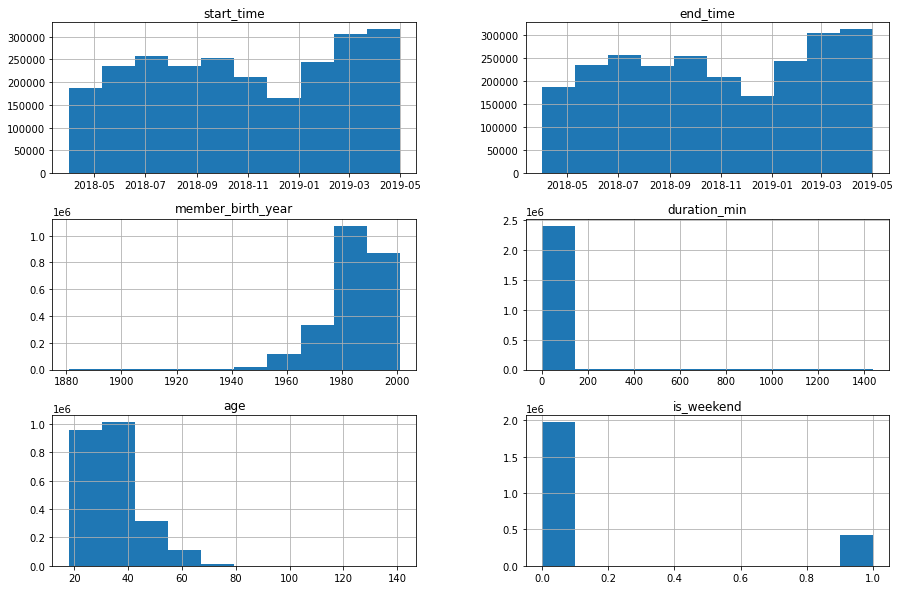

In [33]:
df.hist(figsize=(15,10));

### Age

How does users age vary across the dataset? What age demography is most popular?

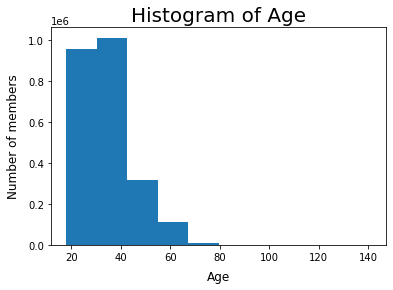

In [34]:
# histogram of age
plt.hist(x=df.age)
plt.title('Histogram of Age', fontsize=20)
plt.xlabel('Age', labelpad=8, fontsize=12)
plt.ylabel('Number of members', labelpad=8, fontsize=12);

The histogram shows that majority of users are between the age of 20 to 40. I'll investigate further using a smaller bin size.

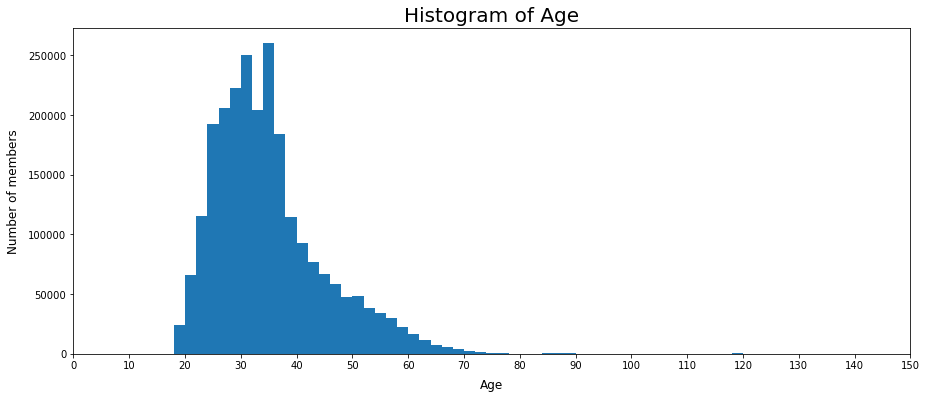

In [35]:
# histogram of members age using a smaller bin size
plt.figure(figsize=[15,6])
bins = np.arange(10,df.age.max()+20,2)
ticks = np.arange(0,200,10)
labels = ['{}'.format(v) for v in ticks]
plt.hist(x=df.age, bins=bins)
plt.xticks(ticks, labels)
plt.xlim(0,150)
plt.title('Histogram of Age', fontsize=20)
plt.xlabel('Age', labelpad=8, fontsize=12)
plt.ylabel('Number of members', labelpad=8, fontsize=12);

The result here shows that there are many bike users between the age 24 and 35 with a larger share at 35 years. There are less bike users between the age 50 and above. The distribution is skewed to the right on a standard scale. I will proceed to explore this distribution using a log scale.

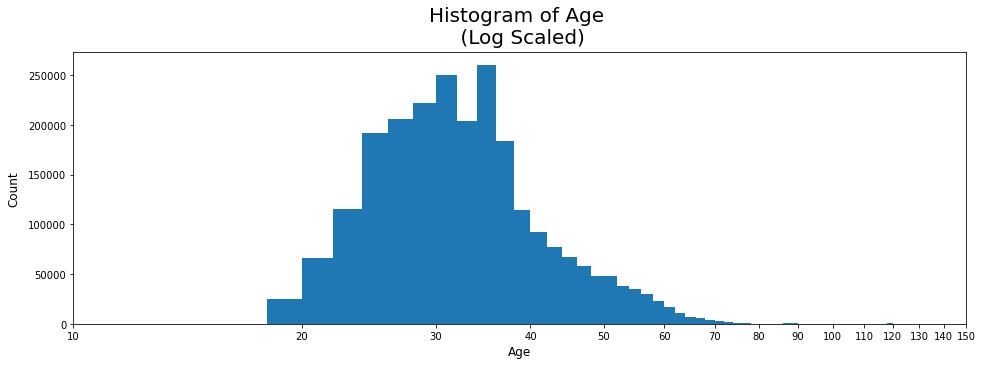

In [36]:
# plotting a histogram of members age using a log scaled
plt.figure(figsize=[16,5])
bins = np.arange(0,df.age.max()+20,2)
ticks = np.arange(10,160,10)
labels = ['{}'.format(v) for v in ticks]
plt.hist(x=df.age, bins=bins)
plt.xscale('log')
plt.xlim((10,150))
plt.xticks(ticks, labels)
plt.title('Histogram of Age \n (Log Scaled)', fontsize=20, y=1.01)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize= 12, labelpad=8)
plt.show();

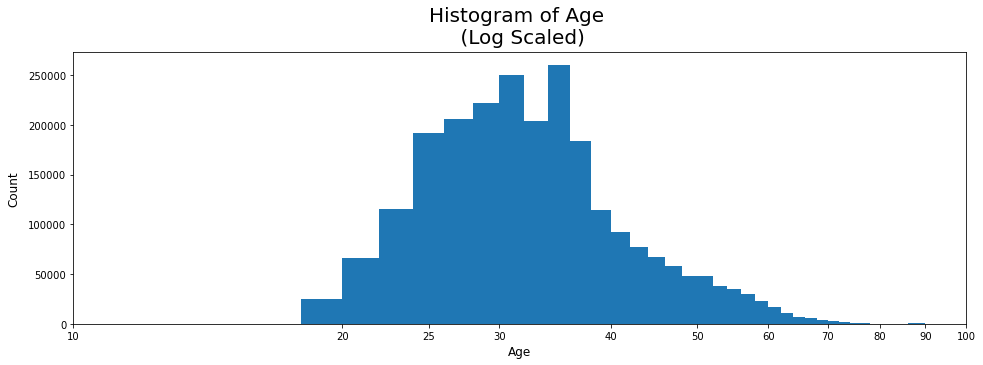

In [37]:
# plotting a histogram of members age using a log scale
plt.figure(figsize=[16,5])
bins = np.arange(0,df.age.max()+20,2)
ticks = [10,20,25,30,40,50,60,70,80,90,100]
labels = ['{}'.format(v) for v in ticks]
plt.hist(x=df.age, bins=bins)
plt.xscale('log')
plt.xlim((10,80))
plt.xticks(ticks, labels)
plt.title('Histogram of Age \n (Log Scaled)', fontsize=20, y=1.01)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize= 12, labelpad=8)
plt.show();

The distribution is still skewed to the right when plotted on a log scale. The distribution looks slightly normal for ages below 50. There are more bike users between the age 25 and 35. The graph peaks in the middle between age 30 and 34.

I will now explor what percentage of customers are below the age of 30 and what percentage are above 30.
### Age groups

In [38]:
# classify ages into groups
age_group= df.age<30
age_group.value_counts()

False    1582753
True      826469
Name: age, dtype: int64

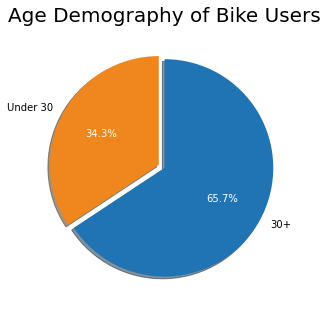

In [39]:
# plot a piechart of the different age groups
plt.figure(figsize = [16, 5])
_, _, autotexts = plt.pie(age_group.value_counts(), labels=['30+','Under 30'], 
        colors=[ '#2074b4','#ef871e'], startangle = 90, counterclock = False, shadow = True, 
        explode = (0, 0.06), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
plt.title('Age Demography of Bike Users', fontsize=20, y=1.015)
plt.show();

There are more customers (65.6%) above the age of 30. 34.4% are below the age of 30.

Next I will explore the gender distribution across the data.
### Gender
Which gender is most dominant among the customers?

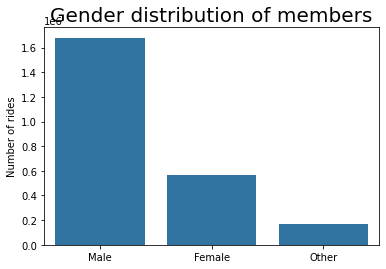

In [40]:
default_color = sns.color_palette()[0]
sns.countplot(x=df.member_gender, color=default_color, order=df.member_gender.value_counts().index)
plt.title('Gender distribution of members', fontsize=20)
plt.xlabel("")
plt.ylabel("Number of rides")
plt.show();

Majority of the customers are Males.

In [41]:
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,duration_min,age,is_weekend
0,2018-04-30 22:49:00,2018-05-01 18:56:00,Cyril Magnin St at Ellis St,Cyril Magnin St at Ellis St,Customer,1983,Other,1206.55,35,0
1,2018-04-30 17:46:00,2018-05-01 16:16:00,19th St at Mission St,San Francisco City Hall (Polk St at Grove St),Customer,1983,Other,1350.57,35,0
2,2018-04-30 16:07:00,2018-05-01 16:02:00,Golden Gate Ave at Polk St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,1974,Male,1435.70,44,0
3,2018-04-30 17:11:00,2018-05-01 12:19:00,Yerba Buena Center for the Arts (Howard St at ...,Jackson Playground,Customer,1974,Female,1147.32,44,0
4,2018-04-30 18:45:00,2018-05-01 11:10:00,Grand Ave at Perkins St,12th St at 4th Ave,Customer,1965,Male,984.85,53,0


Next I will investigate the different user categories in the dataset.
### User Type

In [42]:
# user counts
df.user_type.value_counts()

Subscriber    2059949
Customer       349273
Name: user_type, dtype: int64

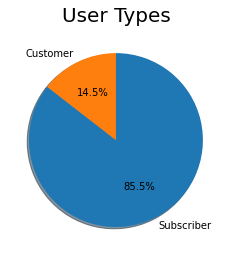

In [43]:
# plotting a chart to show user types
plt.pie(df.user_type.value_counts(),  autopct='%1.1f%%', shadow=True, labels=['Subscriber','Customer'],
        startangle=90, counterclock=False)
plt.title('User Types', fontsize=20, y=1.015)
plt.show();

A larger percentage, 85.4%, of bike users are Suscribers. Only about 14.6% are casual customers.

Now I will look at the distribution of duration among users. This is a major point of interest. 
### Duration

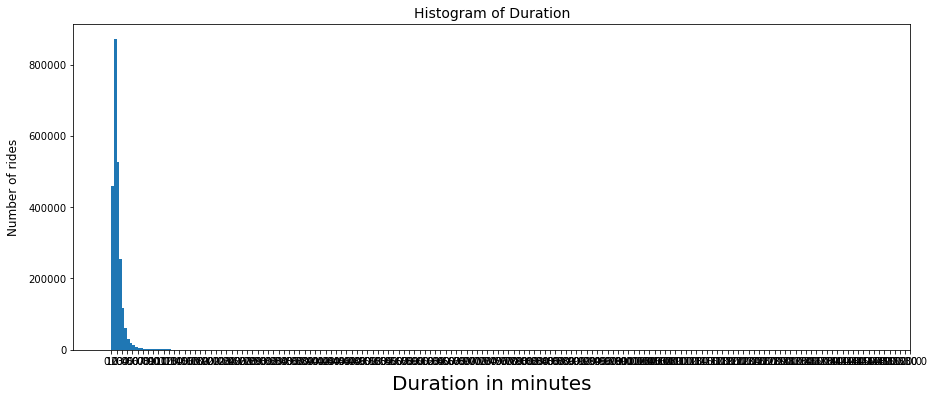

In [44]:
plt.figure(figsize=[15,6])
bins= np.arange(0, df.duration_min.max()+20, 5)
ticks = np.arange(0,df.duration_min.max()+100,10)
labels = ['{}'.format(v) for v in ticks]
plt.hist(x=df.duration_min, bins=bins)
plt.xticks(ticks,labels)
plt.title('Histogram of Duration', fontsize=14)
plt.xlabel('Duration in minutes', labelpad=8, fontsize=20)
plt.ylabel('Number of rides', labelpad=8, fontsize=12);

The histogram above does not show the distribution clearly. I will use a smaller bin size to explor it.

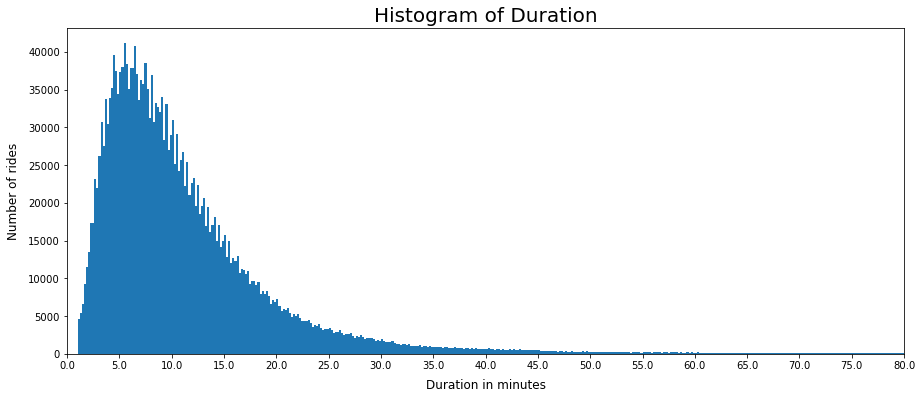

In [45]:
plt.figure(figsize=[15,6])
bins= np.arange(0, df.duration_min.max()+20, 0.2)
ticks = np.arange(0,df.duration_min.max()+20,5)
labels = ['{}'.format(v) for v in ticks]
plt.hist(x=df.duration_min, bins=bins)
plt.xticks(ticks,labels)
plt.xlim(0,80)
plt.title('Histogram of Duration', fontsize=20)
plt.xlabel('Duration in minutes', labelpad=8, fontsize=12)
plt.ylabel('Number of rides', labelpad=8, fontsize=12);

The distribution is skewed to the right with most of the trips being under 30 minutes. The distribution peaked between 5 and 7 minutes and there has been a steady decline as the trip duration got longer. I will plot this on a log scale to see if it is normal.

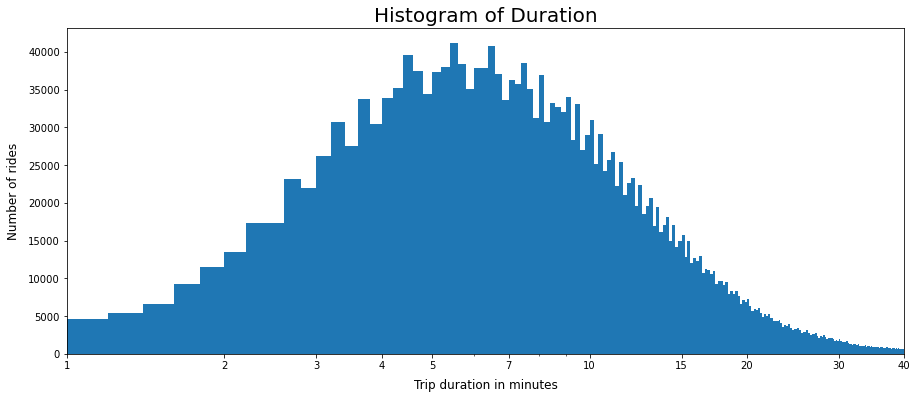

In [46]:
plt.figure(figsize=[15,6])
bins= np.arange(0, df.duration_min.max()+20, 0.2)
ticks = ticks = [1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 85]
labels = ['{}'.format(v) for v in ticks]
plt.hist(x=df.duration_min, bins=bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlim(1,40)
plt.title('Histogram of Duration', fontsize=20)
plt.xlabel('Trip duration in minutes', labelpad=8, fontsize=12)
plt.ylabel('Number of rides', labelpad=8, fontsize=12);

The distribution is normal when plotted on a log scale. This can be smoothed by increasing the bin size to about 0.25. Although, this would hide some information.

### Time Series Analysis

I will start my time series analysis by looking at the number of trips taken per month.

Text(0, 0.5, 'Number of Trips')

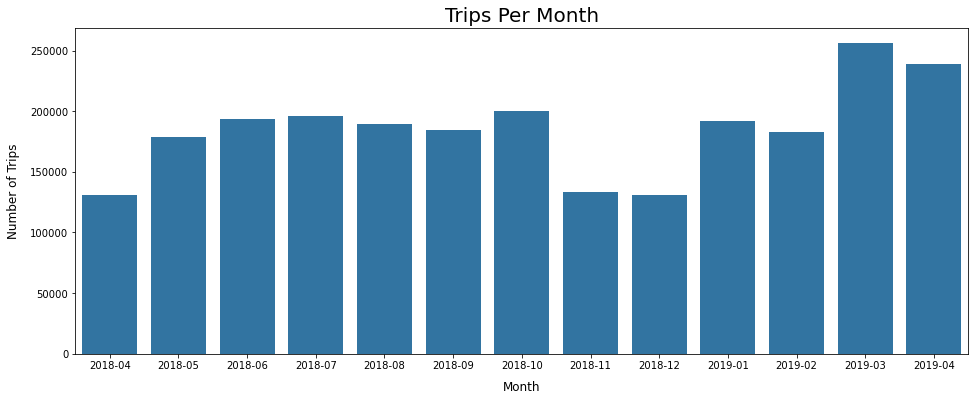

In [47]:
plt.figure(figsize=(16,6))
sns.countplot(x=df.start_time.dt.to_period('M'), color=default_color)
plt.title("Trips Per Month", fontsize=20)
plt.xlabel('Month', labelpad=10, fontsize=12)
plt.ylabel('Number of Trips', labelpad=10, fontsize=12)

Steady increase can be seen up till November and December, 2018. Number of users dropped during this periodup till February 2019. I suspect that the data is seasonal. However, there isn't enough data to back it up. More data is needed to investigate further the trend between November to February of previous years.

Now, I'll check the monthly growth rate. Although the previous chart shows how the number of trips over the month varies, I will explore the percentage difference of growth between each month.

In [48]:
# calculate the monthly growth rate
growth_rate = df.start_time.dt.to_period('M').value_counts().sort_index().pct_change()
growth_rate

2018-04         NaN
2018-05    0.365605
2018-06    0.082523
2018-07    0.010990
2018-08   -0.034626
2018-09   -0.024386
2018-10    0.083771
2018-11   -0.332086
2018-12   -0.018556
2019-01    0.462473
2019-02   -0.044929
2019-03    0.397691
2019-04   -0.066507
Freq: M, Name: start_time, dtype: float64

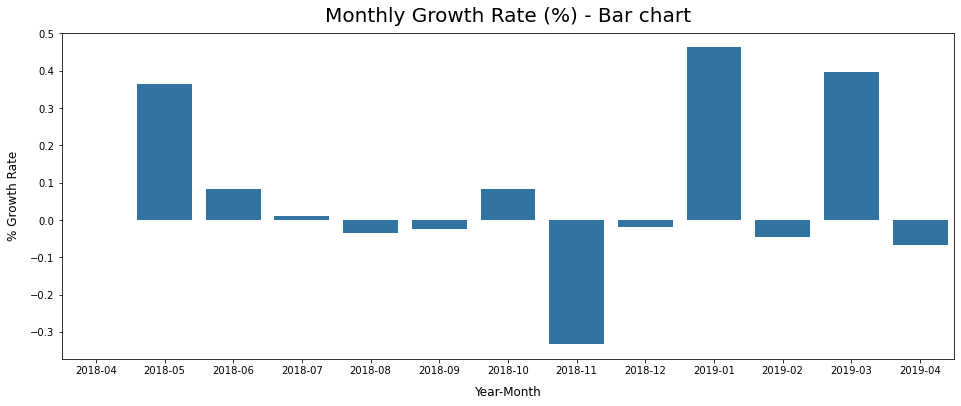

In [49]:
# Days with most trips
plt.figure(figsize=[16,6])
sns.barplot(x=growth_rate.index, y=growth_rate.values, color = default_color);
plt.title('Monthly Growth Rate (%) - Bar chart', fontsize=20, y=1.015)
plt.xlabel('Year-Month', labelpad=10, fontsize=12)
plt.ylabel('% Growth Rate', labelpad=10, fontsize=12);

The growth rate flunctuates over the months. There is a very negative decrease in November 2018. Demand for bikes dropped by almost 30% compared to October 2018. Demand for bikes increased by over 40% in January 2019 compared to December 2018. More data is needed to investigate the cause of thes flunctuations.

I will plot the same growth rate data on a line chart.

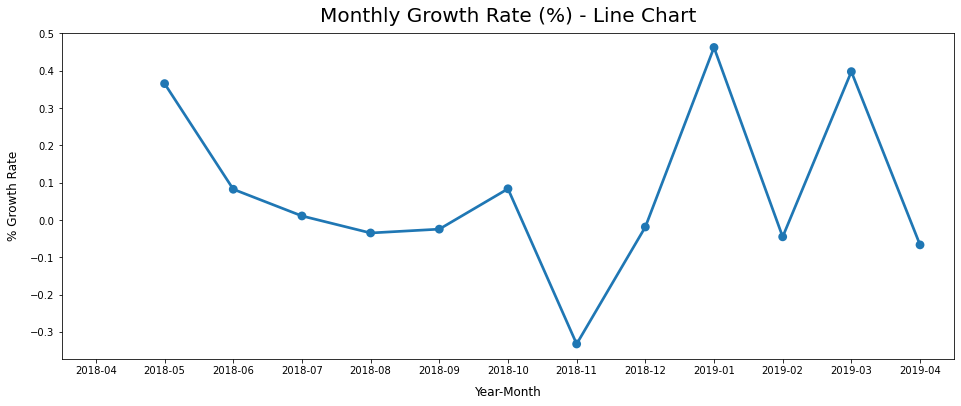

In [50]:
# Days with most trips
plt.figure(figsize=[16,6])
sns.pointplot(x=growth_rate.index, y=growth_rate.values, color = default_color)
plt.title('Monthly Growth Rate (%) - Line Chart', fontsize=20, y=1.015)
plt.xlabel('Year-Month', labelpad=10, fontsize=12)
plt.ylabel('% Growth Rate', labelpad=10, fontsize=12);

Next, I will explore the number of trips per each day of the month.

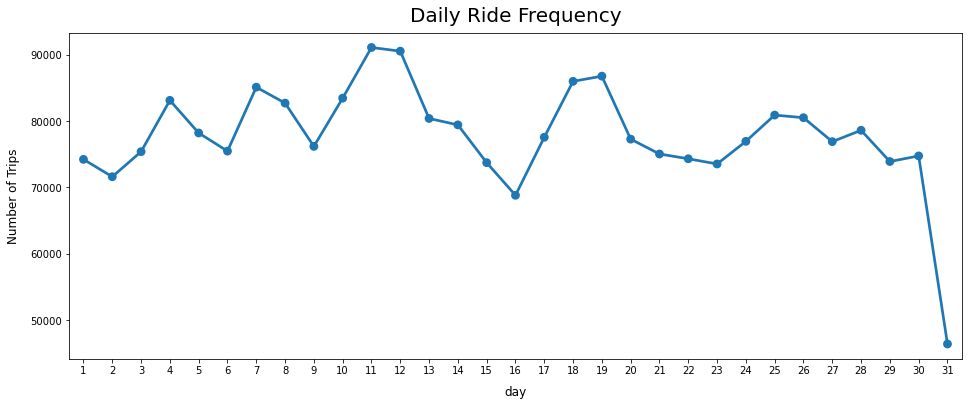

In [51]:
# Days with most trips
plt.figure(figsize=[16,6])
trips_per_day = (df['start_time'].dt.day.value_counts().sort_index())
sns.pointplot(x=trips_per_day.index, y=trips_per_day.values, color = default_color);
plt.title('Daily Ride Frequency', fontsize=20, y=1.015)
plt.xlabel('day', labelpad=10, fontsize=12)
plt.ylabel('Number of Trips', labelpad=10, fontsize=12);

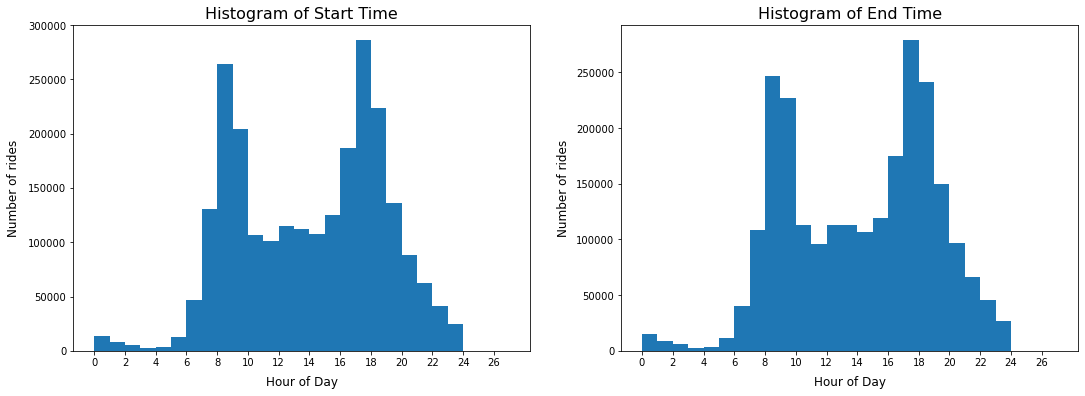

In [52]:
plt.figure(figsize=[18,6])

# Start Time
plt.subplot(1,2,1)
bins= np.arange(0, df['start_time'].dt.hour.max()+5, 1)
ticks = np.arange(0,df['start_time'].dt.hour.max()+5,2)
labels = ['{}'.format(v) for v in ticks]
plt.hist(x=df['start_time'].dt.hour, bins=bins)
plt.xticks(ticks,labels)
#plt.xlim(0,80)
plt.title('Histogram of Start Time', fontsize=16)
plt.xlabel('Hour of Day', labelpad=8, fontsize=12)
plt.ylabel('Number of rides', labelpad=8, fontsize=12)

# End Time
plt.subplot(1,2,2)
bins= np.arange(0, df['end_time'].dt.hour.max()+5, 1)
ticks = np.arange(0,df['end_time'].dt.hour.max()+5,2)
labels = ['{}'.format(v) for v in ticks]
plt.hist(x=df['end_time'].dt.hour, bins=bins)
plt.xticks(ticks,labels)
#plt.xlim(0,80)
plt.title('Histogram of End Time', fontsize=16)
plt.xlabel('Hour of Day', labelpad=8, fontsize=12)
plt.ylabel('Number of rides', labelpad=6, fontsize=12);

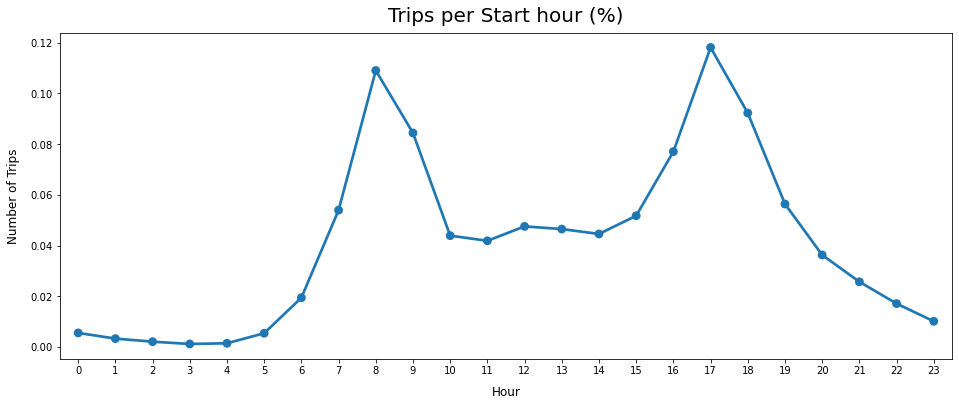

In [53]:
# Days with most trips
plt.figure(figsize=[16,6])
# calculate trips per day
trips_per_day = (df['start_time'].dt.hour.value_counts().sort_index())/bike_df.shape[0]
# plot chart
sns.pointplot(x=trips_per_day.index, y=trips_per_day.values, color = default_color);
plt.title('Trips per Start hour (%)', fontsize=20, y=1.015)
plt.xlabel('Hour', labelpad=10, fontsize=12)
plt.ylabel('Number of Trips', labelpad=10, fontsize=12);

There is an obvious rise in the demand in the morning between 5am amd 8am, and in the evening, between 4pm and 6pm. Demand peaked at 8am in the morning. This can be attributed to children going to school and workers going to work.  Demand also peaked in the evening at 5pm which can also be attributed to workers going home from work.

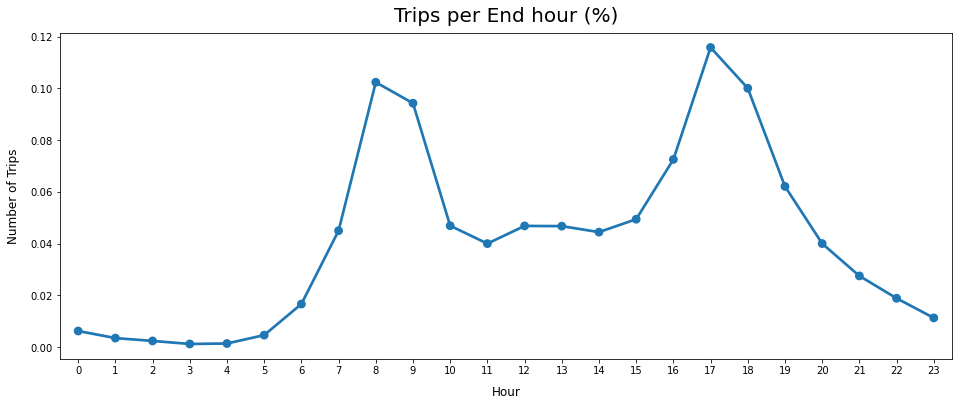

In [54]:
# Days with most trips
plt.figure(figsize=[16,6])
trips_per_day = (df['end_time'].dt.hour.value_counts().sort_index())/df.shape[0]
sns.pointplot(x=trips_per_day.index, y=trips_per_day.values, color = default_color);
plt.title('Trips per End hour (%)', fontsize=20, y=1.015)
plt.xlabel('Hour', labelpad=10, fontsize=12)
plt.ylabel('Number of Trips', labelpad=10, fontsize=12);

In [55]:
# calculate day period from the start time
conditions = [(df.start_time.dt.hour>=0) & (df.start_time.dt.hour <5),
             (df.start_time.dt.hour>=5) & (df.start_time.dt.hour <12),
             (df.start_time.dt.hour >=12) & (df.start_time.dt.hour <16),
             (df.start_time.dt.hour >=16) & (df.start_time.dt.hour <19),
             (df.start_time.dt.hour >=19) & (df.start_time.dt.hour <=23)]

values = ['Midnight','Morning','Afternoon','Evening', 'Night']
time = np.select(conditions,values)
time

array(['Night', 'Evening', 'Evening', ..., 'Midnight', 'Midnight',
       'Midnight'], dtype='<U11')

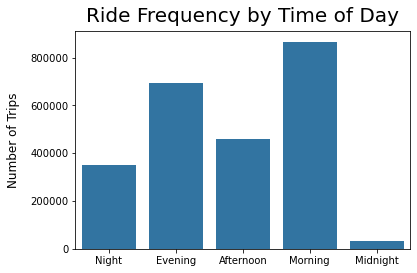

In [56]:
# Days with most trips
#plt.figure(figsize=[16,6])
sns.countplot(x=time, color = default_color)
plt.title('Ride Frequency by Time of Day', fontsize=20, y=1.015)
plt.xlabel('', labelpad=10, fontsize=12)
plt.ylabel('Number of Trips', labelpad=10, fontsize=12);

More trips were taken in the morning, as stated earlier.
Next I will explore trips per weekday

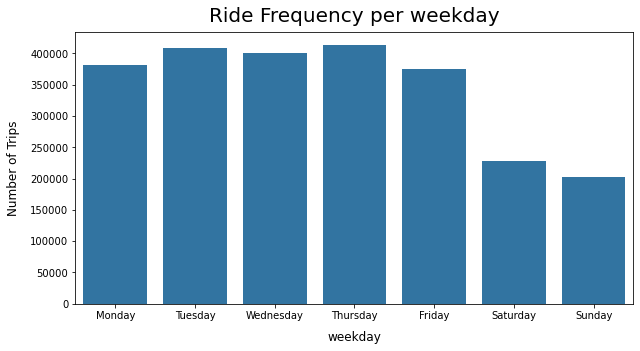

In [57]:
plt.figure(figsize=[10,5])
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x=df.start_time.dt.day_name(), order=weekday, color=default_color)
plt.title('Ride Frequency per weekday', fontsize=20, y=1.015)
plt.xlabel('weekday', labelpad=10, fontsize=12)
plt.ylabel('Number of Trips', labelpad=10, fontsize=12);

Demand is lower on weekends (saturday & sunday), and is higher on weekdays. This could be because users use bikeshare service to commute to work.

In [58]:
# Exploring most popular stations
top10_start_stations = df['start_station_name'].value_counts()[:10]
top10_end_stations = df['end_station_name'].value_counts()[:10]

### Most popular start and end stations
Here, I will explore 10 most popular start and end station. 

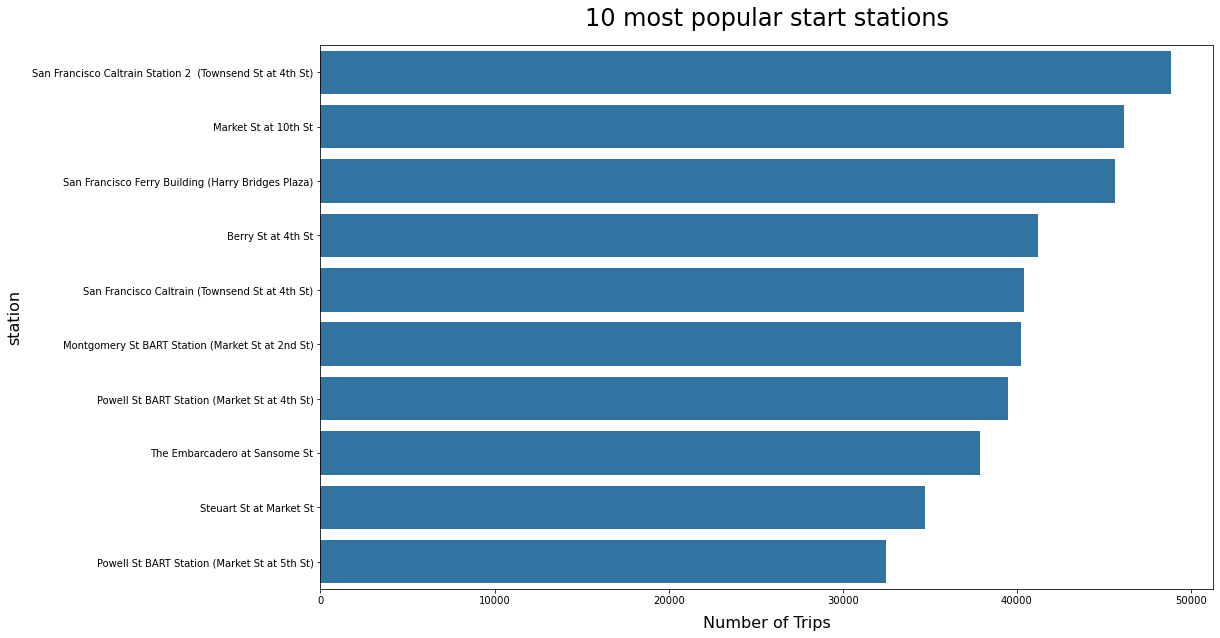

In [59]:
# 10 most popular start stations
plt.figure(figsize=(16,10))
sns.barplot(x=top10_start_stations, y=top10_start_stations.index, color=default_color)
plt.title('10 most popular start stations', fontsize=24, y=1.025)
plt.xlabel('Number of Trips', labelpad=10, fontsize=16)
plt.ylabel('station', labelpad=10, fontsize=16);

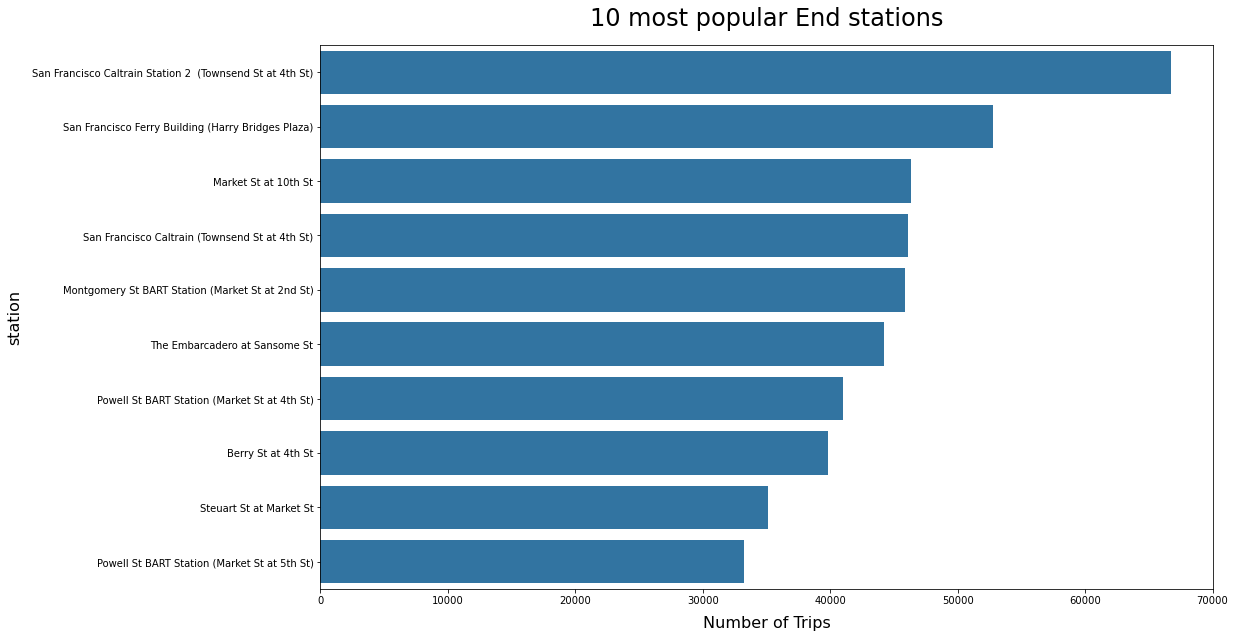

In [60]:
# 10 most popular end stations
plt.figure(figsize=(16,10))
sns.barplot(x=top10_end_stations, y=top10_end_stations.index, color=default_color)
plt.title('10 most popular End stations', fontsize=24, y=1.025)
plt.xlabel('Number of Trips', labelpad=10, fontsize=16)
plt.ylabel('station', labelpad=10, fontsize=16);

Most popular start and end stations are different. This means the most bikes should be removed from the popular end stations at all times to stock the start stations in orser to serve customers better.

In [61]:
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,duration_min,age,is_weekend
0,2018-04-30 22:49:00,2018-05-01 18:56:00,Cyril Magnin St at Ellis St,Cyril Magnin St at Ellis St,Customer,1983,Other,1206.55,35,0
1,2018-04-30 17:46:00,2018-05-01 16:16:00,19th St at Mission St,San Francisco City Hall (Polk St at Grove St),Customer,1983,Other,1350.57,35,0
2,2018-04-30 16:07:00,2018-05-01 16:02:00,Golden Gate Ave at Polk St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,1974,Male,1435.70,44,0
3,2018-04-30 17:11:00,2018-05-01 12:19:00,Yerba Buena Center for the Arts (Howard St at ...,Jackson Playground,Customer,1974,Female,1147.32,44,0
4,2018-04-30 18:45:00,2018-05-01 11:10:00,Grand Ave at Perkins St,12th St at 4th Ave,Customer,1965,Male,984.85,53,0


In [62]:
df.describe()

,member_birth_year,duration_min,age,is_weekend
count,2.409222e+06,2.409222e+06,2.409222e+06,2.409222e+06
mean,1.983819e+03,1.371074e+01,3.454213e+01,1.785228e-01
std,1.000157e+01,3.594837e+01,9.984789e+00,3.829523e-01
min,1.881000e+03,1.020000e+00,1.800000e+01,0.000000e+00
25%,1.980000e+03,5.750000e+00,2.700000e+01,0.000000e+00
50%,1.986000e+03,9.150000e+00,3.300000e+01,0.000000e+00
75%,1.991000e+03,1.435000e+01,3.900000e+01,0.000000e+00
max,2.001000e+03,1.438020e+03,1.410000e+02,1.000000e+00


### Unusual points in the distributions
The duration distribution is heavily skewed to the right. The distribution became normal after I set a limit of 40 on the x-axis and also applied the log transformation. The age distribution was also skewed to the right both before and after applying log transformations.

### Features transformed during data wrangling and analysis

In the wrangling phase, I calculated the calculated the age of members and stored it in the `age` column; I also converted the start_time and end_time column to a datetime format; As for the user types, I converted it to a categorical variable. I filled missing values in the `birth_year` column with the mean, filled missing values in `start_station` and `end_station` with N/A.  

Finally, during my analysis, I created to age categories (under 30 and 30+) to better understand the age distribution. There are outliers in the `birth_year`and `age` column. Some age are way above the age of 80, this could be a data entry error. However, I did not drop those rows because `age` is not the main feature of interest.

<a id='bivariate'></a>
## Bivariate Exploration

I'll start by creating a heat map of the correlation matrix.

In [63]:
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,duration_min,age,is_weekend
0,2018-04-30 22:49:00,2018-05-01 18:56:00,Cyril Magnin St at Ellis St,Cyril Magnin St at Ellis St,Customer,1983,Other,1206.55,35,0
1,2018-04-30 17:46:00,2018-05-01 16:16:00,19th St at Mission St,San Francisco City Hall (Polk St at Grove St),Customer,1983,Other,1350.57,35,0
2,2018-04-30 16:07:00,2018-05-01 16:02:00,Golden Gate Ave at Polk St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,1974,Male,1435.70,44,0
3,2018-04-30 17:11:00,2018-05-01 12:19:00,Yerba Buena Center for the Arts (Howard St at ...,Jackson Playground,Customer,1974,Female,1147.32,44,0
4,2018-04-30 18:45:00,2018-05-01 11:10:00,Grand Ave at Perkins St,12th St at 4th Ave,Customer,1965,Male,984.85,53,0


In [64]:
df.corr()

,member_birth_year,duration_min,age,is_weekend
member_birth_year,1.000000,-0.002588,-0.998699,0.051971
duration_min,-0.002588,1.000000,0.001812,0.066514
age,-0.998699,0.001812,1.000000,-0.051876
is_weekend,0.051971,0.066514,-0.051876,1.000000


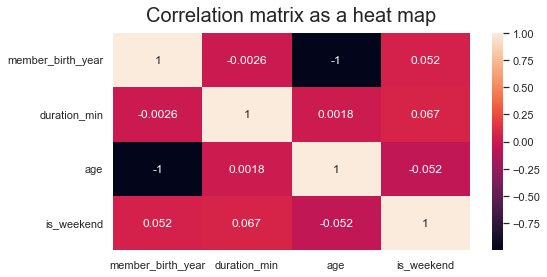

In [65]:
# Checking for linear correlation

corr_df = df.corr()
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(corr_df, annot=True)
plt.title('Correlation matrix as a heat map', fontsize=20, y=1.025)
plt.show()

There is nothing interesting to see in the correlation heatmap. 

Next I'll explore how weekdays affect trip duration using a violin plot.

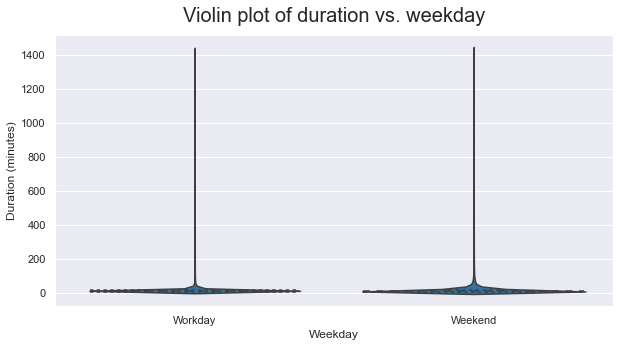

In [66]:
# Violin plot of `duration` vs `is_weekend`

plt.figure(figsize = (10,5))
sns.violinplot(data=df, x='is_weekend', y='duration_min', color = default_color, inner='quartile')
ticks = [0, 1]
labels = ['Workday', 'Weekend']
plt.xticks(ticks, labels)
plt.title('Violin plot of duration vs. weekday', fontsize=20, y=1.025)
plt.xlabel('Weekday')
plt.ylabel('Duration (minutes)');

The violin plots have a very long tail in the duration. I will replot the chart for duration less than 100 minutes

In [67]:
duration = df[df.duration_min<100]

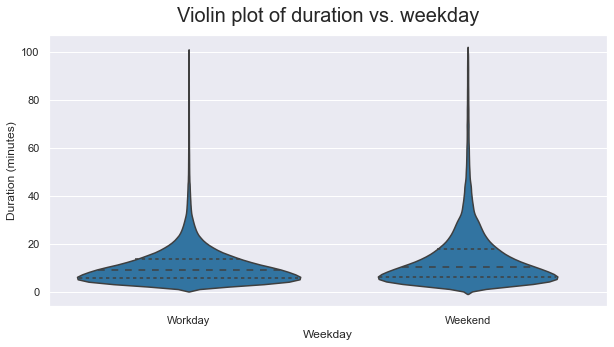

In [68]:
# Violin plot of `duration` vs `is_weekend`
plt.figure(figsize = (10,5))
sns.violinplot(data=duration, x='is_weekend', y='duration_min', color = default_color, inner='quartile')
ticks = [0, 1]
labels = ['Workday', 'Weekend']
plt.xticks(ticks, labels)
plt.title('Violin plot of duration vs. weekday', fontsize=20, y=1.025)
plt.xlabel('Weekday')
plt.ylabel('Duration (minutes)');

On average, there are longer trips on weekends compared to workdays.

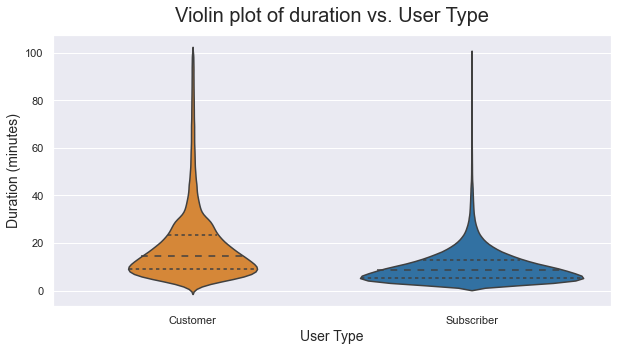

In [69]:
# Violin plot of `duration` vs `user type`

plt.figure(figsize = (10,5))
sns.violinplot(data=duration, x='user_type', y='duration_min', color = default_color, inner='quartile',
               palette=['#ef871e', '#2074b4'])

plt.title('Violin plot of duration vs. User Type', fontsize=20, y=1.025)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14);

Customers seems to take longer trips than suscribers. Their distribution also have more spread than suscribers.

### Monthly Trips per user type

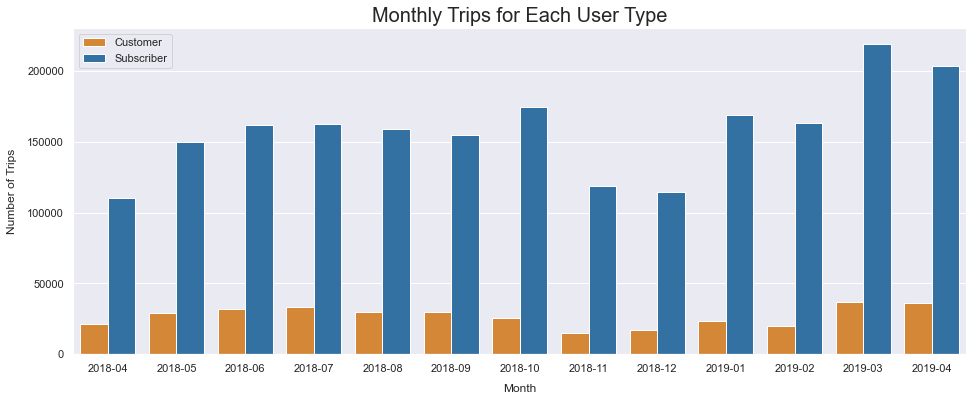

In [70]:
# Bike rides per month for each user type
plt.figure(figsize=[16,6])
palette=['#ef871e', '#2074b4', '#00796B']
sns.countplot(x=df.start_time.dt.to_period('M'),  hue=df.user_type, palette=palette)
plt.title("Monthly Trips for Each User Type", fontsize=20)
plt.xlabel('Month', labelpad=10, fontsize=12)
plt.ylabel('Number of Trips', labelpad=10, fontsize=12)
plt.legend(title='')

The barplot shows similar changes in the number of trips each month for both user types. There are more subscribers than casual cusomers each month. Number of trips taken dropped significatly for both users in between November and December 2018

### Daily Trips per user type
I will explore the daily trips among the different customers categories.

In [71]:
# create masks for customers and subscribers
customer = df['user_type'] == 'Customer'
subscriber = df['user_type'] == 'Subscriber'

In [72]:
# Daily trip per user type
customers_daily_trip = (df.start_time[customer].dt.day.value_counts().sort_index())/df[customer].shape[0]
subscribers_daily_trip = (df.start_time[subscriber].dt.day.value_counts().sort_index())/df[subscriber].shape[0]

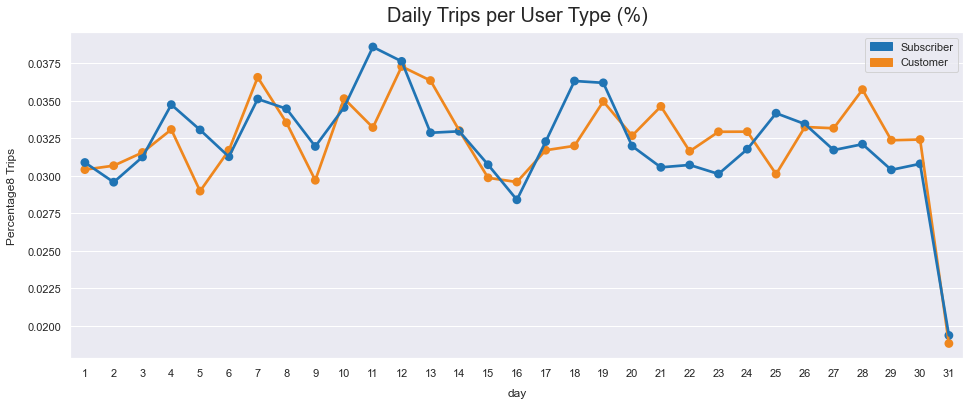

In [73]:
# Days with most trips
plt.figure(figsize=[16,6])
sns.pointplot(x=customers_daily_trip.index, y=customers_daily_trip.values, color=palette[0])
sns.pointplot(x=subscribers_daily_trip.index, y=subscribers_daily_trip.values, color=palette[1])
plt.title('Daily Trips per User Type (%)', fontsize=20, y=1.015)
plt.xlabel('day', labelpad=10, fontsize=12)
plt.ylabel('Percentage8 Trips', labelpad=10, fontsize=12)

customer_legend = mpatches.Patch(color=palette[0], label='Customer')
subscriber_legend = mpatches.Patch(color=palette[1], label='Subscriber')
plt.legend(handles=[subscriber_legend, customer_legend], title='')
plt.show();

This line chart illustrates that; for customers, demand peaks on the  7𝑡ℎ ,  19𝑡ℎ ,  and  28𝑡ℎ ; and drops significantly on  9𝑡ℎ and 25𝑡ℎ ; For suscribers, the daily trend drops significantly on the 16th.

### Hourly Trips per User Type

In [74]:
# Hours with most trips per user type
hourly_trips_customer = (df.start_time[customer].dt.hour.value_counts().sort_index())/df[customer].shape[0]
hourly_trips_subscriber = (df.start_time[subscriber].dt.hour.value_counts().sort_index())/df[subscriber].shape[0]

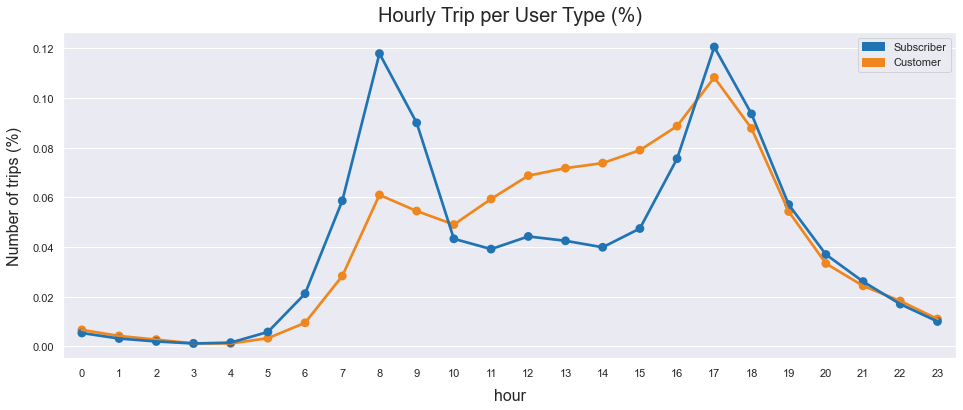

In [75]:
# Point plot for hourly rides per user type
plt.figure(figsize= (16,6))
sns.pointplot(x=hourly_trips_customer.index, y=hourly_trips_customer.values, color=palette[0])
sns.pointplot(x=hourly_trips_subscriber.index, y=hourly_trips_subscriber.values, color=palette[1])
plt.title('Hourly Trip per User Type (%)', fontsize=20, y=1.015)
plt.xlabel('hour', labelpad=10, fontsize=16)
plt.ylabel('Number of trips (%)', labelpad=10, fontsize=16)
# Creating artists specifically for adding to the legend (Proxy artists)
customer_legend = mpatches.Patch(color=palette[0], label='Customer')
subscriber_legend = mpatches.Patch(color=palette[1], label='Subscriber')
plt.legend(handles=[subscriber_legend, customer_legend])
plt.show();

The hourly trip for subscribers is similar to what I found in the univariate exploration. There are less customers between 5am and 9am. However, from 10am  to 4pm, the number of customers increased significantly than suscribers. Demand declines for both user types significantly at night.

### Trips per weekday for each user type

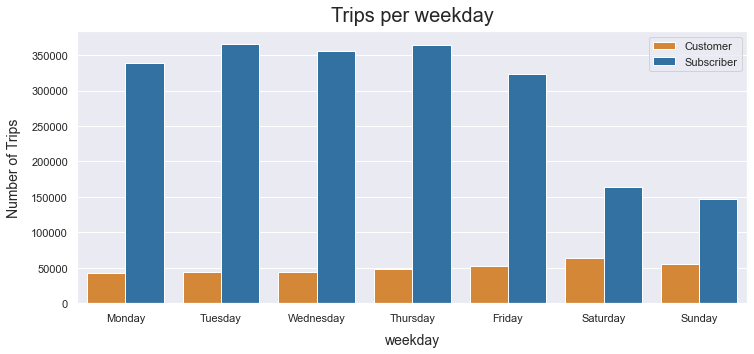

In [76]:
plt.figure(figsize=[12,5])
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x=df.start_time.dt.day_name(), order=weekday, hue=df.user_type,palette=palette)
plt.title('Trips per weekday', fontsize=20, y=1.015)
plt.xlabel('weekday', labelpad=10, fontsize=14)
plt.ylabel('Number of Trips', labelpad=10, fontsize=14)
plt.legend(title='');

Customers demand follow a similar partern during the week. Subscribers demand drops significantly on weekeds. Based on what I saw in the earlier plot, this could be a confirmation that subscribers use bikeshare services to commute to work. We can also conclude that customers use the service for various reasons seeing as demand is consistent over the weekend.

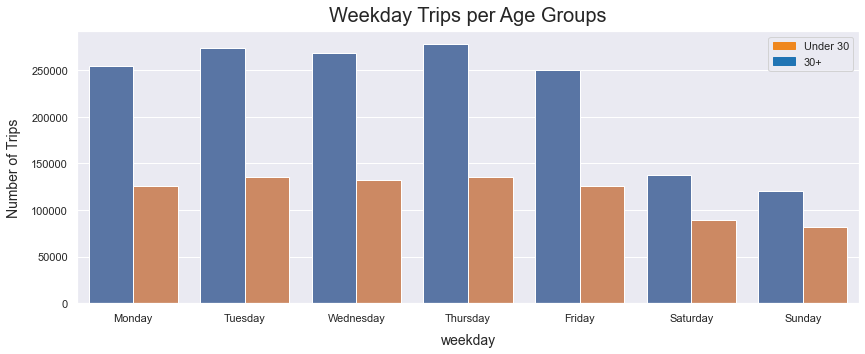

In [77]:
plt.figure(figsize=[14,5])
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x=df.start_time.dt.day_name(), order=weekday, hue=age_group, palette=sns.color_palette())
plt.title('Weekday Trips per Age Groups', fontsize=20, y=1.015)
plt.xlabel('weekday', labelpad=10, fontsize=14)
plt.ylabel('Number of Trips', labelpad=10, fontsize=14)
plt.legend(title='')

under30legend = mpatches.Patch(color=palette[0], label='Under 30')
plus_30_legend = mpatches.Patch(color=palette[1], label='30+')
plt.legend(handles=[under30legend, plus_30_legend])
plt.show();

Both under 30 and 30+ customers demand demand drops significantly on weekedns with higher demands on workdays.

### How did the feature(s) of interest vary with other features in the dataset?

Customers tends to take longer trips than suscribers and their `duration` distribution have more spread. `Duration` is also longer on weekends than workdays indicating longer trips on weekends.

Although, there has been a decline in the number of Trips since April 2018, number of trips dropped drastically between November and December 2018 and keeps flunctuating afterwards.More data is needed to investigate the cause.

The number of customers vary significantly per hour by the different user types. There are more suscribers in the morning between the hours of 5 and 9. However, between the hours of 10 and 16, number of suscribers dropped while the number of customers increased. Also number of trips is smoother for customers than suscribers during the week. Number of trips also drops on weekends for the different age groups.

<a id='multivariate'></a>
## Multivariate Exploration

I will explore the length of duration per weekday for each user type

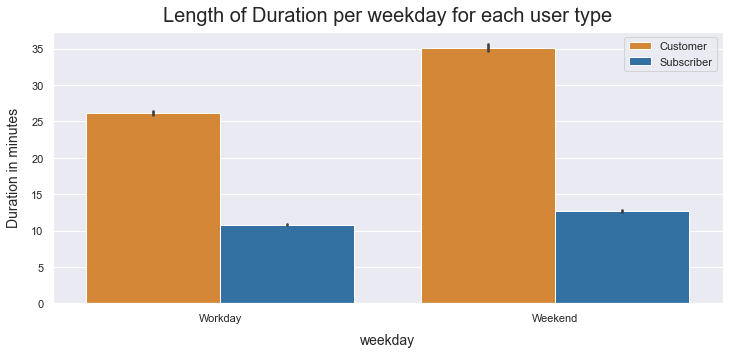

In [78]:
plt.figure(figsize=[12,5])
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(x=df.is_weekend, y=df.duration_min, hue=df.user_type,palette=palette)
ticks = [0, 1]
labels = ['Workday', 'Weekend']
plt.xticks(ticks, labels)
plt.title('Length of Duration per weekday for each user type', fontsize=20, y=1.015)
plt.xlabel('weekday', labelpad=10, fontsize=14)
plt.ylabel('Duration in minutes', labelpad=10, fontsize=14)
plt.legend(title='');

As observed in the bivariate exploration, there are longer trips on weekends than workdays. Customers generally take longer trips than suscribers both on workdays and on weekends.

<a id='conclude'></a>
## Conclusions
I explored over 2 million rides for a period of 1 year between April 2018 and April 2019 for in this exploratory analysis. The data was wrangled and analyzed using univariate, bivariate and multivariate explorations. Some analysis needs more data to investigate the trends observed further, however, I could not get more data. This is a limitation of this exploration.